1. Setup & Imports

In [1]:
import numpy as np
import time
import optuna
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
import matplotlib.pyplot as plt
import seaborn as sns
import random as pyrandom
from scipy.stats import ttest_ind

sns.set(style="whitegrid")


d:\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

2. Definition of the 10D Ackley Function

In [ ]:
def ackley(x, a=20, b=0.2, c=2 * np.pi):
    x = np.array(x)
    d = len(x)
    sum_sq = np.sum(x**2)
    sum_cos = np.sum(np.cos(c * x))
    term1 = -a * np.exp(-b * np.sqrt(sum_sq / d))
    term2 = -np.exp(sum_cos / d)
    return term1 + term2 + a + np.exp(1)


3. Definition of the Search Space

In [ ]:
# Search Space ([-32.768, 32.768]^10)
DIMENSIONS = 10
LOWER_BOUND = -32.768
UPPER_BOUND = 32.768

# Optuna search space
def optuna_objective(trial):
    x = [trial.suggest_uniform(f"x{i}", LOWER_BOUND, UPPER_BOUND) for i in range(DIMENSIONS)]
    return ackley(x)

# Hyperopt search space
hyperopt_space = [hp.uniform(f"x{i}", LOWER_BOUND, UPPER_BOUND) for i in range(DIMENSIONS)]


4. Make Optimization Runs Across Different Seeds

In [ ]:
def run_optuna(seed, n_trials=50):
    sampler = optuna.samplers.TPESampler(seed=seed, n_startup_trials=20)
    study = optuna.create_study(direction="minimize", sampler=sampler)
    start = time.time()
    study.optimize(optuna_objective, n_trials=n_trials)
    duration = time.time() - start
    return {
        "framework": "optuna",
        "seed": seed,
        "best_value": study.best_value,
        "convergence": [t.value for t in study.trials],
        "time": duration,
    }

def run_hyperopt(seed, n_trials=50):
    rng = np.random.default_rng(seed)
    np.random.seed(seed)

    trials = Trials()

    def objective(x):
        return {"loss": ackley([x[f"x{i}"] for i in range(DIMENSIONS)]), "status": STATUS_OK}

    space = {f"x{i}": hyperopt_space[i] for i in range(DIMENSIONS)}
    
    start = time.time()
    best = fmin(
        fn=objective,
        space=space,
        algo=tpe.suggest,
        max_evals=n_trials,
        trials=trials,
        rstate=rng
    )
    duration = time.time() - start
    losses = [t["result"]["loss"] for t in trials.trials]
    
    return {
        "framework": "hyperopt",
        "seed": seed,
        "best_value": min(losses),
        "convergence": losses,
        "time": duration,
    }


In [ ]:
def run_multiple_seeds(framework_runner, seeds, n_trials=50):
    results = []
    for seed in seeds:
        print(f"Running {framework_runner.__name__} with seed {seed}...")
        result = framework_runner(seed=seed, n_trials=n_trials)
        results.append(result)
    return results

SEEDS = list(range(20))
n_seeds = len(SEEDS)
n_trials = 500 

optuna_results = run_multiple_seeds(run_optuna, SEEDS, n_trials=n_trials)
hyperopt_results = run_multiple_seeds(run_hyperopt, SEEDS, n_trials=n_trials)



[I 2025-08-06 17:18:05,695] A new study created in memory with name: no-name-c01415f5-6fd2-4aef-aab9-395c6e4ab20b
C:\Users\lenna\AppData\Local\Temp\ipykernel_54936\1375384012.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  x = [trial.suggest_uniform(f"x{i}", LOWER_BOUND, UPPER_BOUND) for i in range(DIMENSIONS)]
[I 2025-08-06 17:18:05,698] Trial 0 finished with value: 20.459938135099247 and parameters: {'x0': 3.1990417933811557, 'x1': 14.102650314582881, 'x2': 6.734700614231251, 'x3': 2.941464280884631, 'x4': -5.003359070525541, 'x5': 9.561316593936375, 'x6': -4.090284522688183, 'x7': 25.67523537925438, 'x8': 30.38660267219546, 'x9': -7.638776622233834}. Best is trial 0 with value: 20.459938135099247.
[I 2025-08-06 17:18:05,706] Trial 1 finished with value: 21.209966567053595 and parameters: {'x0': 19.118492095785506, 'x1': 1.8936574609263488

Running run_optuna with seed 0...


[I 2025-08-06 17:18:05,987] Trial 20 finished with value: 21.0951712784835 and parameters: {'x0': -31.435360067588555, 'x1': -13.111703642658684, 'x2': -12.55832379860133, 'x3': -6.283273445874815, 'x4': 6.272634118516131, 'x5': 31.2571874038497, 'x6': -5.8695834121103765, 'x7': 16.049931158609112, 'x8': -12.646260853121017, 'x9': 5.7292655889376505}. Best is trial 13 with value: 19.092383460854382.
[I 2025-08-06 17:18:06,069] Trial 21 finished with value: 20.317555544197024 and parameters: {'x0': -20.004536760735604, 'x1': 8.816125738715561, 'x2': 19.99866873604621, 'x3': -16.90387628607095, 'x4': 28.95580452629481, 'x5': 19.070128541108037, 'x6': 11.662428698890412, 'x7': -3.941471452963537, 'x8': 6.645608333412179, 'x9': 2.7088038392674747}. Best is trial 13 with value: 19.092383460854382.
[I 2025-08-06 17:18:06,167] Trial 22 finished with value: 21.473529251873156 and parameters: {'x0': -31.478361831653828, 'x1': 30.59075949107592, 'x2': 20.445614046140886, 'x3': -6.488148232815481

Running run_optuna with seed 1...


[I 2025-08-06 17:19:16,801] Trial 18 finished with value: 21.19988503604948 and parameters: {'x0': 8.50116654016525, 'x1': -18.994036086221072, 'x2': 16.564587969826903, 'x3': -28.407465157976723, 'x4': -15.707989699556741, 'x5': 19.97239508948389, 'x6': -20.091090853997592, 'x7': 9.139708289347759, 'x8': 1.6167933787330142, 'x9': 27.84021514809185}. Best is trial 8 with value: 20.80775013842117.
[I 2025-08-06 17:19:16,823] Trial 19 finished with value: 21.883233048968265 and parameters: {'x0': -15.512582849356697, 'x1': -28.445173960931818, 'x2': 15.40528297008624, 'x3': 17.837459344146218, 'x4': 26.72661970967095, 'x5': 28.309721526883926, 'x6': -31.853669713471273, 'x7': -17.408846323946584, 'x8': 7.653186404460634, 'x9': 29.42673359258363}. Best is trial 8 with value: 20.80775013842117.
[I 2025-08-06 17:19:17,005] Trial 20 finished with value: 21.355427960726463 and parameters: {'x0': 15.889582170246094, 'x1': -9.93047096192587, 'x2': -4.344341576886926, 'x3': 31.95903552944529, 'x

Running run_optuna with seed 2...


[I 2025-08-06 17:20:11,826] Trial 21 finished with value: 20.940966240607892 and parameters: {'x0': -19.801198557597132, 'x1': 26.3923490371386, 'x2': 0.6549552026004251, 'x3': -2.0111025569636114, 'x4': 10.076729949389208, 'x5': -18.37391453578904, 'x6': 10.276481926435558, 'x7': -15.371305951522519, 'x8': -24.74034844484987, 'x9': 3.7572479471249896}. Best is trial 3 with value: 20.027935135315772.
[I 2025-08-06 17:20:11,904] Trial 22 finished with value: 21.1497173236337 and parameters: {'x0': -6.67933316367901, 'x1': 28.054807494627116, 'x2': -2.1172416959388665, 'x3': 32.40843882834739, 'x4': 27.81415271523813, 'x5': 32.04578141745189, 'x6': 4.060123268760895, 'x7': -3.3790829744240227, 'x8': -9.994248019045962, 'x9': 17.450860035026977}. Best is trial 3 with value: 20.027935135315772.
[I 2025-08-06 17:20:12,008] Trial 23 finished with value: 20.356753119191588 and parameters: {'x0': -18.070790305012505, 'x1': 19.872568058938924, 'x2': 2.746160805170689, 'x3': 0.07365474176219089,

Running run_optuna with seed 3...


[I 2025-08-06 17:21:05,177] Trial 21 finished with value: 21.286167712378823 and parameters: {'x0': -21.049489255581094, 'x1': -32.24923688148009, 'x2': 3.464980622927274, 'x3': -30.646759846387848, 'x4': -6.172140374461863, 'x5': -7.218001040538205, 'x6': 32.3826248242338, 'x7': 18.946717433534463, 'x8': 7.05590526290559, 'x9': 6.66525961445976}. Best is trial 4 with value: 19.845646757597226.
[I 2025-08-06 17:21:05,280] Trial 22 finished with value: 21.18140556248816 and parameters: {'x0': -16.654233959200507, 'x1': -21.32597724069684, 'x2': -3.920714906899981, 'x3': -13.170251717787803, 'x4': -4.370594465042825, 'x5': 11.936540569697248, 'x6': 22.050178768307784, 'x7': 31.510436566971375, 'x8': -26.257922487370536, 'x9': 7.691554925057734}. Best is trial 4 with value: 19.845646757597226.
[I 2025-08-06 17:21:05,336] Trial 23 finished with value: 20.521032440734448 and parameters: {'x0': -3.4424124440723425, 'x1': -11.044012327681843, 'x2': 7.724427961214296, 'x3': -32.21899644331342,

Running run_optuna with seed 4...


[I 2025-08-06 17:21:54,265] Trial 21 finished with value: 19.83813191992117 and parameters: {'x0': 10.042625186990826, 'x1': 5.55058767833124, 'x2': -24.078804831095844, 'x3': -8.17024977477538, 'x4': -11.003217488327087, 'x5': -9.17894624899365, 'x6': 15.806514096958722, 'x7': -15.744392370983961, 'x8': 0.5575866639052318, 'x9': 5.6487410622271845}. Best is trial 4 with value: 19.639412378742325.
[I 2025-08-06 17:21:54,373] Trial 22 finished with value: 19.82157482318627 and parameters: {'x0': 8.333097218112966, 'x1': 8.774178342603946, 'x2': -16.587560718446674, 'x3': -6.495566256811561, 'x4': -11.811001342595757, 'x5': -11.73210726127122, 'x6': 15.536207419033154, 'x7': -14.791925434874438, 'x8': 1.4835290508087535, 'x9': 2.2893617124838364}. Best is trial 4 with value: 19.639412378742325.
[I 2025-08-06 17:21:54,474] Trial 23 finished with value: 20.508533445211253 and parameters: {'x0': 8.040619953683592, 'x1': 11.217129927907317, 'x2': -19.02137966035549, 'x3': -31.646962119340753

Running run_optuna with seed 5...


[I 2025-08-06 17:22:53,799] Trial 20 finished with value: 20.901140389565207 and parameters: {'x0': -3.491812957800252, 'x1': 5.621666516457506, 'x2': 5.628955612483153, 'x3': 8.98250864913172, 'x4': 30.047341759550516, 'x5': 19.99565328571331, 'x6': 11.121327961392081, 'x7': -22.954115496421462, 'x8': -29.488753956519627, 'x9': -5.845413663139471}. Best is trial 16 with value: 20.445449086959492.
[I 2025-08-06 17:22:53,903] Trial 21 finished with value: 20.943271023292233 and parameters: {'x0': 3.4296741815466776, 'x1': 7.0746624662046464, 'x2': 11.58258040115763, 'x3': 2.2441343286182356, 'x4': -15.196895836700548, 'x5': 22.708803743260717, 'x6': -2.9136398598220623, 'x7': -22.307917806885722, 'x8': -3.411932599489029, 'x9': -30.306819678085716}. Best is trial 16 with value: 20.445449086959492.
[I 2025-08-06 17:22:54,009] Trial 22 finished with value: 21.005227218203572 and parameters: {'x0': 12.37661984440182, 'x1': 30.744892988210278, 'x2': -5.073946091066196, 'x3': 9.5120960720318

Running run_optuna with seed 6...


[I 2025-08-06 17:23:54,018] Trial 20 finished with value: 20.986947671521598 and parameters: {'x0': 32.01315203684072, 'x1': -0.6059202694136232, 'x2': 12.743069540974517, 'x3': -11.281569836827819, 'x4': -30.332129602401483, 'x5': 8.302244047869884, 'x6': -6.275356795091961, 'x7': -20.23538977430109, 'x8': 14.070150495639144, 'x9': -2.9191721975659934}. Best is trial 0 with value: 20.533818605883788.
[I 2025-08-06 17:23:54,142] Trial 21 finished with value: 21.155985087098173 and parameters: {'x0': -10.377792175059703, 'x1': -5.262053462770684, 'x2': 8.276974396199046, 'x3': -18.34895841176057, 'x4': 29.033540441262303, 'x5': 6.019267430777287, 'x6': -9.547358921627245, 'x7': 13.709689499749912, 'x8': -15.776493268704373, 'x9': 29.603611680226646}. Best is trial 0 with value: 20.533818605883788.
[I 2025-08-06 17:23:54,267] Trial 22 finished with value: 21.31430583750341 and parameters: {'x0': -23.75584302664177, 'x1': -32.25833148301744, 'x2': 17.38775689384493, 'x3': -11.811748692032

Running run_optuna with seed 7...


[I 2025-08-06 17:24:44,912] Trial 20 finished with value: 19.38592738112911 and parameters: {'x0': -8.501572948222696, 'x1': -15.430623414794445, 'x2': 4.713272919537336, 'x3': -11.568610967569887, 'x4': 1.4849279525125443, 'x5': 16.867050342043147, 'x6': 12.801183079754964, 'x7': 3.157019903288635, 'x8': -7.196132735319015, 'x9': -8.366634895101393}. Best is trial 20 with value: 19.38592738112911.
[I 2025-08-06 17:24:45,043] Trial 21 finished with value: 20.372758912360908 and parameters: {'x0': -9.068454247630884, 'x1': -15.408313252124971, 'x2': 4.7832098964958085, 'x3': -10.219739362956785, 'x4': -0.8911976039069673, 'x5': 17.263178147327572, 'x6': 12.081799234263359, 'x7': 5.517240604579705, 'x8': -6.672033505780117, 'x9': 28.523109062241577}. Best is trial 20 with value: 19.38592738112911.
[I 2025-08-06 17:24:45,126] Trial 22 finished with value: 20.431211271261546 and parameters: {'x0': -11.195362747887417, 'x1': -17.894889547651726, 'x2': 2.9062538592812364, 'x3': 7.62711333920

Running run_optuna with seed 8...


[I 2025-08-06 17:25:41,981] Trial 20 finished with value: 21.646553315374792 and parameters: {'x0': -7.5478704143218085, 'x1': 19.823570080015973, 'x2': 14.631397960301266, 'x3': 11.530921514475427, 'x4': 12.35363688713872, 'x5': -10.119814388714884, 'x6': -31.413073381840114, 'x7': 20.52377132032793, 'x8': -20.933398864645255, 'x9': -30.517942961809574}. Best is trial 1 with value: 20.212100506345216.
[I 2025-08-06 17:25:42,094] Trial 21 finished with value: 21.32097201796274 and parameters: {'x0': -7.007900530763218, 'x1': 1.7661351925172468, 'x2': 12.114785012668023, 'x3': 9.293447625925271, 'x4': 11.716531219662418, 'x5': 32.672481974455906, 'x6': -26.640679188050317, 'x7': 32.27041019264851, 'x8': 11.236177579318104, 'x9': 26.22253147712995}. Best is trial 1 with value: 20.212100506345216.
[I 2025-08-06 17:25:42,188] Trial 22 finished with value: 21.206465309070527 and parameters: {'x0': 14.64173156289808, 'x1': -24.808012282254094, 'x2': 31.77928461824759, 'x3': 8.198167905260172

Running run_optuna with seed 9...


[I 2025-08-06 17:26:38,794] Trial 20 finished with value: 20.83916666581963 and parameters: {'x0': 21.660032803152237, 'x1': -12.65348991449116, 'x2': -31.078145408869965, 'x3': -9.536368835021001, 'x4': -7.183555692925811, 'x5': 7.304769850605484, 'x6': -13.5324804616248, 'x7': -7.172235515625388, 'x8': 11.207637450216323, 'x9': -12.854390014898815}. Best is trial 7 with value: 20.115624123912294.
[I 2025-08-06 17:26:38,939] Trial 21 finished with value: 20.96636422307031 and parameters: {'x0': -3.343515135491266, 'x1': 31.29078669333903, 'x2': 6.804645271698129, 'x3': -14.850379200824415, 'x4': -7.2171623197893275, 'x5': 12.95926853910906, 'x6': -31.99266825497243, 'x7': 20.077660876309125, 'x8': 11.716469612158694, 'x9': -15.520290664348193}. Best is trial 7 with value: 20.115624123912294.
[I 2025-08-06 17:26:39,014] Trial 22 finished with value: 20.69565101548635 and parameters: {'x0': 21.11261602399067, 'x1': -6.8215658425183845, 'x2': -11.647314941130343, 'x3': -12.45476031669926

Running run_optuna with seed 10...


[I 2025-08-06 17:27:27,401] Trial 16 finished with value: 21.272898144808845 and parameters: {'x0': -13.375651039095203, 'x1': -30.30662014948621, 'x2': -30.757038301318595, 'x3': -3.073310706811963, 'x4': 16.04741214699964, 'x5': 3.754911743108508, 'x6': -7.5291951388762755, 'x7': -21.753181140902306, 'x8': 22.168293913637214, 'x9': 6.491458598436381}. Best is trial 2 with value: 19.13677546061366.
[I 2025-08-06 17:27:27,415] Trial 17 finished with value: 21.36957433445723 and parameters: {'x0': 18.527998328502427, 'x1': 22.839897744652014, 'x2': 6.760888786094313, 'x3': 18.41958861473593, 'x4': 7.584931907735999, 'x5': -31.38091803134165, 'x6': 16.41444871290821, 'x7': -21.230902753119835, 'x8': -2.718812980034077, 'x9': 0.860009773940412}. Best is trial 2 with value: 19.13677546061366.
[I 2025-08-06 17:27:27,419] Trial 18 finished with value: 21.157875146092195 and parameters: {'x0': -1.0472069341625847, 'x1': 22.569667430930686, 'x2': -21.311396588937583, 'x3': -31.808888825233414,

Running run_optuna with seed 11...


[I 2025-08-06 17:28:22,108] Trial 21 finished with value: 20.941749999297148 and parameters: {'x0': 32.73380677035836, 'x1': 2.3596287549951187, 'x2': -17.287923551942736, 'x3': 12.786957640335597, 'x4': -14.981396036093528, 'x5': -1.312579786978672, 'x6': -21.63226126106294, 'x7': 13.323214217838878, 'x8': 5.16503640844792, 'x9': -16.007733549926694}. Best is trial 9 with value: 19.677790659399864.
[I 2025-08-06 17:28:22,283] Trial 22 finished with value: 21.55762979059404 and parameters: {'x0': 25.369129868613427, 'x1': 9.678622007540733, 'x2': -29.941987437066217, 'x3': 19.585359223762385, 'x4': -13.010637939370993, 'x5': -6.496943746442162, 'x6': -20.484544922661673, 'x7': 10.930566046165335, 'x8': 4.532596755162103, 'x9': -31.38984172685624}. Best is trial 9 with value: 19.677790659399864.
[I 2025-08-06 17:28:22,387] Trial 23 finished with value: 21.483587601012502 and parameters: {'x0': 24.98228028869779, 'x1': 2.2934196329466108, 'x2': -16.644912951266114, 'x3': 32.6449554344997

Running run_optuna with seed 12...


[I 2025-08-06 17:29:12,550] Trial 21 finished with value: 20.638460033112363 and parameters: {'x0': -3.465674304576286, 'x1': -18.421034925881525, 'x2': 19.778147820254844, 'x3': 13.082849694220384, 'x4': 26.080397705412782, 'x5': 14.314404064481224, 'x6': -12.85192087062947, 'x7': -19.054605362652296, 'x8': 10.85193493810971, 'x9': -15.044503945195398}. Best is trial 20 with value: 20.621156297971933.
[I 2025-08-06 17:29:12,678] Trial 22 finished with value: 21.363848231670936 and parameters: {'x0': -3.216189967614431, 'x1': -19.561732292583553, 'x2': 19.473503685311023, 'x3': 11.682885336407839, 'x4': 29.69565527115816, 'x5': 14.213439116947804, 'x6': -15.955504413684514, 'x7': -17.49761567342785, 'x8': 10.457157871536367, 'x9': -17.27344998336804}. Best is trial 20 with value: 20.621156297971933.
[I 2025-08-06 17:29:12,782] Trial 23 finished with value: 20.98122872323979 and parameters: {'x0': -11.577170500300438, 'x1': -20.836969145451558, 'x2': 20.243051799563403, 'x3': -2.7875760

Running run_optuna with seed 13...


[I 2025-08-06 17:30:02,480] Trial 20 finished with value: 21.14241442583532 and parameters: {'x0': -32.76673554701035, 'x1': 21.226300215948264, 'x2': 13.98948191711024, 'x3': 4.968954510069004, 'x4': 11.749565687598727, 'x5': 4.111709537046691, 'x6': -22.49367579968694, 'x7': -32.51091830277679, 'x8': -2.071411611265824, 'x9': 31.856007329135952}. Best is trial 14 with value: 20.80703828141083.
[I 2025-08-06 17:30:02,565] Trial 21 finished with value: 20.663808054459032 and parameters: {'x0': -8.15353458621523, 'x1': 14.942151331811608, 'x2': 28.963891855187647, 'x3': -10.380451801800097, 'x4': -10.665611521343218, 'x5': -11.477266661974673, 'x6': -21.90938316724553, 'x7': 0.8916770834867817, 'x8': -2.1332332742913476, 'x9': -29.860692401661534}. Best is trial 21 with value: 20.663808054459032.
[I 2025-08-06 17:30:02,624] Trial 22 finished with value: 21.326586265856385 and parameters: {'x0': -4.354000115216537, 'x1': 17.43523800426992, 'x2': 32.531746791935895, 'x3': 6.75521844311536

Running run_optuna with seed 14...


[I 2025-08-06 17:30:58,079] Trial 20 finished with value: 20.05125991557598 and parameters: {'x0': -29.137460504958494, 'x1': 4.990092267835037, 'x2': 7.607719173323498, 'x3': 12.929102211314568, 'x4': 5.850604368521154, 'x5': 6.814235690624159, 'x6': 17.224663387519126, 'x7': 9.408116884979707, 'x8': -13.307177087816838, 'x9': 5.138105711695193}. Best is trial 17 with value: 18.961318481839015.
[I 2025-08-06 17:30:58,334] Trial 21 finished with value: 21.35525597521172 and parameters: {'x0': -30.521212607806227, 'x1': 4.828417895936277, 'x2': 2.80386897221727, 'x3': 13.460624880383456, 'x4': 3.9212805257243386, 'x5': -31.17286256798856, 'x6': -32.453551704215094, 'x7': 10.844574384627224, 'x8': -11.734125477391421, 'x9': 5.5459913820673705}. Best is trial 17 with value: 18.961318481839015.
[I 2025-08-06 17:30:58,503] Trial 22 finished with value: 21.00996103657387 and parameters: {'x0': -24.222056204983677, 'x1': 1.1294963656842187, 'x2': 9.742924422537103, 'x3': 30.90729582974709, 'x

Running run_optuna with seed 15...


[I 2025-08-06 17:32:08,041] Trial 20 finished with value: 19.370064681411716 and parameters: {'x0': 7.75652737901442, 'x1': 2.9923137253155003, 'x2': 23.111726085908487, 'x3': -12.366148222573955, 'x4': -5.051325665508586, 'x5': 4.751886756798732, 'x6': 7.54565968132955, 'x7': 16.07580744985502, 'x8': -2.7161468296680287, 'x9': 13.098648330865057}. Best is trial 3 with value: 17.717695057082306.
[I 2025-08-06 17:32:08,219] Trial 21 finished with value: 20.19197720425426 and parameters: {'x0': 7.601396591443492, 'x1': 0.5978536536551384, 'x2': 24.680601987715615, 'x3': -12.75524973791084, 'x4': -7.975158890499181, 'x5': 5.5385234247455095, 'x6': 7.131850796868421, 'x7': 17.630071324431015, 'x8': -3.6991883148509097, 'x9': 13.306520129284731}. Best is trial 3 with value: 17.717695057082306.
[I 2025-08-06 17:32:08,366] Trial 22 finished with value: 19.814044448389478 and parameters: {'x0': 5.174993502412288, 'x1': 12.019087638178068, 'x2': 24.993689594270435, 'x3': -11.547528565185559, 'x

Running run_optuna with seed 16...


[I 2025-08-06 17:33:22,664] Trial 20 finished with value: 20.119372391575375 and parameters: {'x0': 10.172094580234717, 'x1': -8.151601714824157, 'x2': -17.60713625628259, 'x3': -24.183361023734854, 'x4': 3.022924952661479, 'x5': -2.848923895817581, 'x6': -16.529874606677563, 'x7': -16.010214082196867, 'x8': -0.6783756204598248, 'x9': -7.472258579300563}. Best is trial 20 with value: 20.119372391575375.
[I 2025-08-06 17:33:22,875] Trial 21 finished with value: 20.833617282780406 and parameters: {'x0': 11.198585500531575, 'x1': -6.226048651785371, 'x2': -14.333310701539283, 'x3': -24.918658012466004, 'x4': 1.873240478608407, 'x5': -3.5789511321243097, 'x6': -17.294954774530034, 'x7': -31.576237263224584, 'x8': 0.2983276063895025, 'x9': -11.107454981421071}. Best is trial 20 with value: 20.119372391575375.
[I 2025-08-06 17:33:22,997] Trial 22 finished with value: 20.83355409702934 and parameters: {'x0': 9.346569223032384, 'x1': -5.998668703892489, 'x2': -14.784596930349045, 'x3': -22.898

Running run_optuna with seed 17...


[I 2025-08-06 17:34:32,483] Trial 20 finished with value: 21.294716020091826 and parameters: {'x0': -28.46003664676619, 'x1': 15.422296643619525, 'x2': -30.158277217983173, 'x3': -12.488629326516946, 'x4': 12.27709336663464, 'x5': -7.163495588563106, 'x6': -6.03591587861553, 'x7': -9.806741201479726, 'x8': -9.720376276668958, 'x9': -31.822660127034773}. Best is trial 0 with value: 20.854080733002338.
[I 2025-08-06 17:34:32,646] Trial 21 finished with value: 21.61621669606918 and parameters: {'x0': -22.424533649079628, 'x1': -7.70756834119695, 'x2': -30.78106664390245, 'x3': 31.69147848158691, 'x4': -8.290040851657851, 'x5': 3.2959204853257837, 'x6': -3.2043279969095337, 'x7': -31.486264289015804, 'x8': 8.373588063526954, 'x9': 10.682886645391353}. Best is trial 0 with value: 20.854080733002338.
[I 2025-08-06 17:34:32,852] Trial 22 finished with value: 20.16676129168654 and parameters: {'x0': -10.141141481139602, 'x1': 12.32784552957834, 'x2': 10.167953159822702, 'x3': -18.7293440088250

Running run_optuna with seed 18...


[I 2025-08-06 17:35:24,630] Trial 20 finished with value: 21.45794776758939 and parameters: {'x0': 28.69603846835527, 'x1': -19.450526290448373, 'x2': -20.269517542074922, 'x3': 16.896270120273307, 'x4': 12.410246362297388, 'x5': 5.951392035089164, 'x6': -30.47835974458828, 'x7': -8.651693220331676, 'x8': 12.456724619909982, 'x9': -1.7024537595496465}. Best is trial 10 with value: 19.521336538042593.
[I 2025-08-06 17:35:24,882] Trial 21 finished with value: 20.872338699363354 and parameters: {'x0': -17.983948159167795, 'x1': 9.30748581048959, 'x2': -15.651812511591142, 'x3': 15.374803250153231, 'x4': 9.09207292254068, 'x5': 32.7121299362979, 'x6': 24.039494416987424, 'x7': -3.279644161448652, 'x8': -9.000921278013717, 'x9': -2.3794380085644224}. Best is trial 10 with value: 19.521336538042593.
[I 2025-08-06 17:35:25,079] Trial 22 finished with value: 19.770321578819164 and parameters: {'x0': 31.112274487131952, 'x1': -17.06672914584137, 'x2': 8.332190659264029, 'x3': -4.327363241581548

Running run_optuna with seed 19...


[I 2025-08-06 17:36:16,121] Trial 20 finished with value: 21.48311290111965 and parameters: {'x0': 32.36267006615127, 'x1': 2.5825545516299773, 'x2': 8.910948259151509, 'x3': -12.538001560604787, 'x4': 15.446465215494904, 'x5': -10.225914842547722, 'x6': -32.47065191666228, 'x7': 8.705482897459301, 'x8': 4.732602423594296, 'x9': -15.493169553196495}. Best is trial 14 with value: 20.090115577107017.
[I 2025-08-06 17:36:16,250] Trial 21 finished with value: 18.439153373538115 and parameters: {'x0': -0.4207166944612508, 'x1': 3.9888140907897416, 'x2': 11.648640749640187, 'x3': -6.87108815461832, 'x4': -19.092444465025224, 'x5': -6.914688056860485, 'x6': -6.854724538095718, 'x7': 3.237000685082885, 'x8': 4.8560428664953275, 'x9': -14.651102866242342}. Best is trial 21 with value: 18.439153373538115.
[I 2025-08-06 17:36:16,423] Trial 22 finished with value: 19.05743511133114 and parameters: {'x0': -7.29566446048295, 'x1': 4.3427673800536555, 'x2': 10.113012283589857, 'x3': -4.54550337218411

Running run_hyperopt with seed 0...
100%|██████████| 500/500 [00:17<00:00, 29.22trial/s, best loss: 10.847020083964715]
Running run_hyperopt with seed 1...
100%|██████████| 500/500 [00:21<00:00, 23.74trial/s, best loss: 12.663747366028574]
Running run_hyperopt with seed 2...
100%|██████████| 500/500 [00:22<00:00, 22.60trial/s, best loss: 14.900364821412754]
Running run_hyperopt with seed 3...
100%|██████████| 500/500 [00:27<00:00, 18.08trial/s, best loss: 13.401605239949564]
Running run_hyperopt with seed 4...
100%|██████████| 500/500 [00:27<00:00, 18.30trial/s, best loss: 15.080067735859735]
Running run_hyperopt with seed 5...
100%|██████████| 500/500 [00:24<00:00, 20.60trial/s, best loss: 14.156712647007021]
Running run_hyperopt with seed 6...
100%|██████████| 500/500 [00:15<00:00, 33.14trial/s, best loss: 14.281012448981981]
Running run_hyperopt with seed 7...
100%|██████████| 500/500 [00:17<00:00, 27.89trial/s, best loss: 15.211909349368316]
Running run_hyperopt with seed 8...
100%

5. Visualization: Convergence Curve

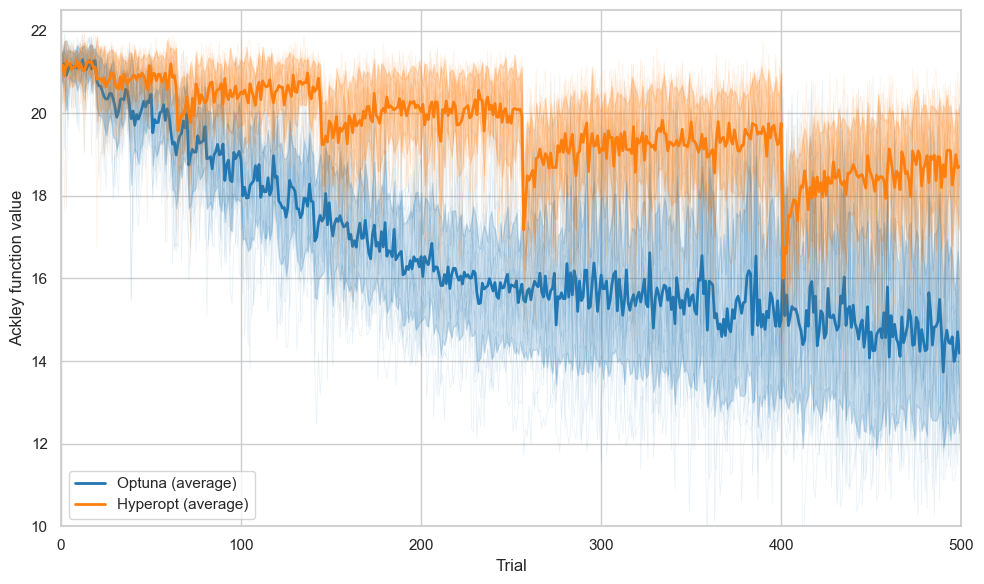

In [ ]:
def plot_convergence_with_bands(results, label, color):
    all_curves = np.array([res["convergence"] for res in results])
    min_len = min(len(c) for c in all_curves)  # truncate to shortest
    all_curves = np.array([c[:min_len] for c in all_curves])
    
    avg = np.mean(all_curves, axis=0)
    std = np.std(all_curves, axis=0)

    for curve in all_curves:
        plt.plot(curve, alpha=0.1, linewidth=0.5, color=color)

    plt.plot(avg, label=f"{label} (average)", color=color, linewidth=2)
    plt.fill_between(range(min_len), avg - std, avg + std, alpha=0.2, color=color)


plt.figure(figsize=(10, 6))
plot_convergence_with_bands(optuna_results, "Optuna", "tab:blue")
plot_convergence_with_bands(hyperopt_results, "Hyperopt", "tab:orange")
plt.xlabel("Trial")
plt.ylabel("Ackley function value")
#plt.title("Convergence Curves with ±1 Std Band")
plt.legend()
save_path = r"D:\MSc Project\Programming\E1 - [-32,32] Bounds"
filename = f"ackley_convergence_curves_{n_seeds}seeds_{n_trials}trials.png"
#plt.savefig(f"{save_path}\\{filename}", dpi=300, bbox_inches='tight')
plt.xlim(0, 500)
plt.ylim(10,22.5)
plt.tight_layout()
plt.savefig(f"{save_path}\\{filename}", dpi=300, bbox_inches='tight')
plt.show()


6. Boxplots: Final Ackley Values & Runtime

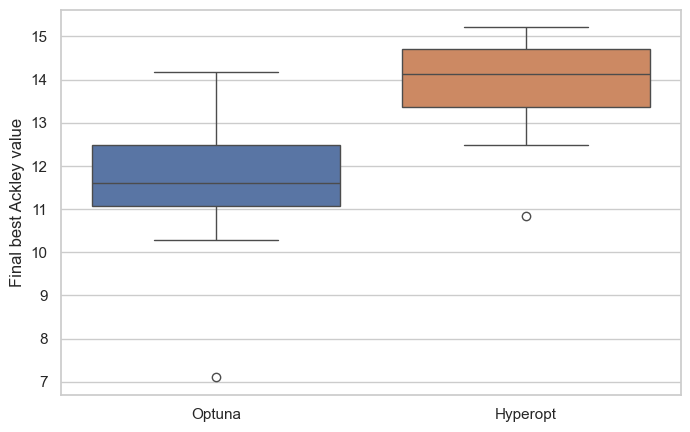

In [ ]:
def plot_boxplot(metric, optuna_results, hyperopt_results, ylabel):
    data = {
        "Optuna": [res[metric] for res in optuna_results],
        "Hyperopt": [res[metric] for res in hyperopt_results],
    }
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=[data["Optuna"], data["Hyperopt"]])
    plt.xticks([0, 1], ["Optuna", "Hyperopt"])
    plt.ylabel(ylabel)
    #plt.title(f"{ylabel} Comparison")
    filename = f"ackley_{metric}_boxplot_{n_seeds}seeds_{n_trials}trials.png"
    plt.savefig(f"{save_path}\\{filename}", dpi=300, bbox_inches='tight')
    plt.show()

plot_boxplot("best_value", optuna_results, hyperopt_results, "Final best Ackley value")


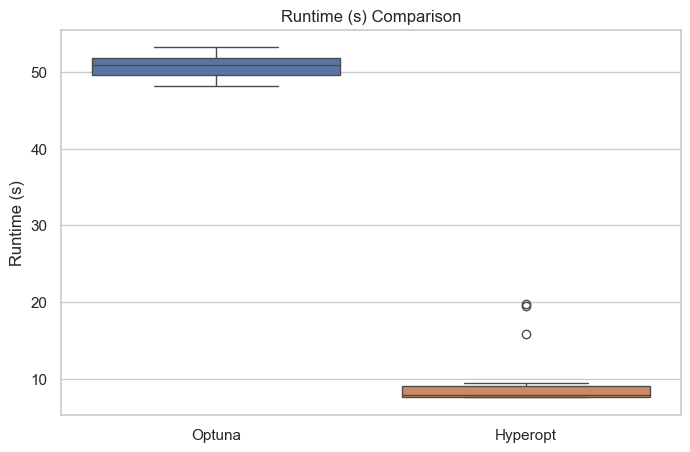

In [ ]:
plot_boxplot("time", optuna_results, hyperopt_results, "Runtime (s)")

7. Runtime Convergence Plots

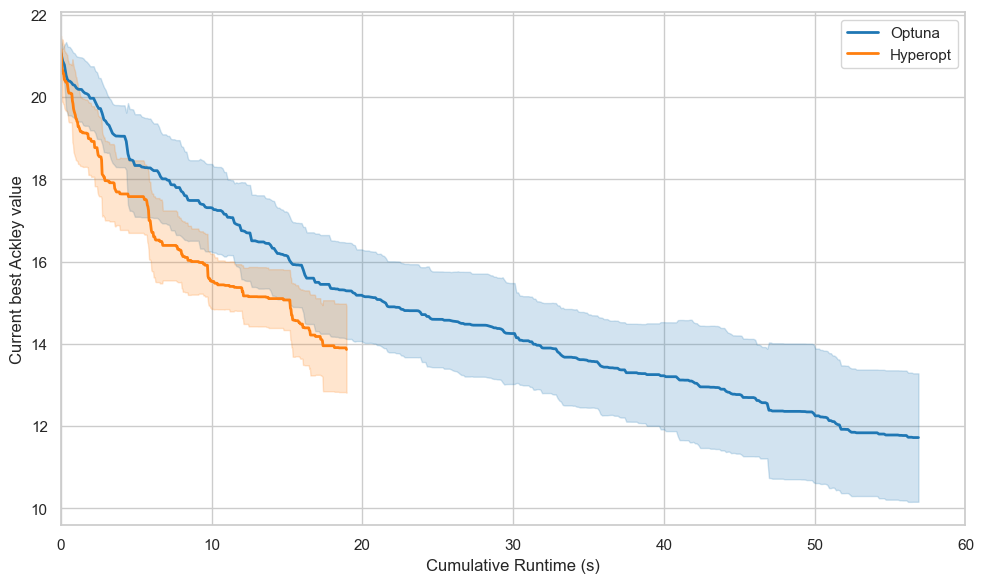

In [ ]:
def plot_runtime_convergence(results, label, color):
    all_times = []
    all_bests = []
    for run in results:
        trials = run["convergence"]
        total_time = run["time"]
        n = len(trials)
        avg_step_time = total_time / n
        times = np.linspace(0, total_time, n)
        best_so_far = np.minimum.accumulate(trials)
        all_times.append(times)
        all_bests.append(best_so_far)

    min_len = min(len(t) for t in all_times)
    times_std = np.array([t[:min_len] for t in all_times])
    bests_std = np.array([b[:min_len] for b in all_bests])
    avg_time = np.mean(times_std, axis=0)
    avg_bests = np.mean(bests_std, axis=0)
    std_bests = np.std(bests_std, axis=0)

    plt.plot(avg_time, avg_bests, label=label, color=color, linewidth=2)
    plt.fill_between(avg_time, avg_bests - std_bests, avg_bests + std_bests, alpha=0.2, color=color)


plt.clf
plt.figure(figsize=(10,6))
plot_runtime_convergence(optuna_results, "Optuna", "tab:blue")
plot_runtime_convergence(hyperopt_results, "Hyperopt", "tab:orange")
plt.xlabel("Cumulative Runtime (s)")
plt.ylabel("Current best Ackley value")
#plt.title("Runtime vs. Objective Progression")
plt.grid(True)
plt.legend()
plt.xlim(0,60)
plt.tight_layout()
plt.savefig(f"{save_path}\\ackley_runtime_convergence_{n_seeds}seeds_{n_trials}trials.png", dpi=300, bbox_inches='tight')
plt.show()



8. Statistical Significance Test (Welch’s t-Test)

In [ ]:
optuna_vals = [res["best_value"] for res in optuna_results]
hyperopt_vals = [res["best_value"] for res in hyperopt_results]

stat, p_value = ttest_ind(optuna_vals, hyperopt_vals, equal_var=False)  # Welch's t-test
print(f"t = {stat:.3f}, p = {p_value:.4f}")


t = -4.958, p = 0.0000
